In [1]:
import numpy as np
import pandas as pd

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)


https://xn--80ahcjeib4ac4d.xn--p1ai/information/solving_systems_of_linear_equations_in_python/

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


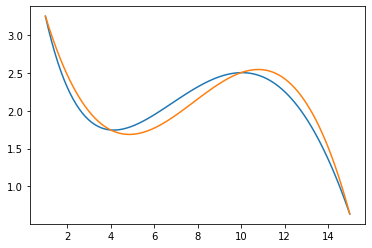

In [4]:
%matplotlib inline

import numpy as np;
import math;
import matplotlib.pyplot as plt;

def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

# approximate at the given points (feel free to experiment: change/add/remove)
points = np.array([1, 4, 10, 15])
n = points.size

# fill A-matrix, each row is 1 or xi^0, xi^1, xi^2, xi^3 .. xi^n
A = np.zeros((n, n))
for index in range(0, n):
    A[index] = np.power(np.full(n, points[index]), np.arange(0, n, 1))

# fill b-matrix, i.e. function value at the given points
b = f(points)

# solve to get approximation polynomial coefficents
solve = np.linalg.solve(A,b)

# define the polynome approximation of the function
def polinom(x): 
    # Yi = solve * Xi where Xi = x^i
    tiles = np.tile(x, (n, 1))
    tiles[0] = np.ones(x.size)
    for index in range(1, n):
        tiles[index] = tiles[index]**index
    return solve.dot(tiles)

# plot the graphs of original function and its approximation
x = np.linspace(1, 15, 100)
plt.plot(x, f(x))
plt.plot(x, polinom(x))

# print out the coefficients of polynome approximating our function
print(solve)